# Lab: Simple Linear Regression
## CMSE 381 - Fall 2022
## Lecture 5 - Sept 12, 2022

In the today's lectures, we are starting focused on simple linear regression, that is, fitting models of the form 
$$
Y =  \beta_0 +  \beta_1 X_1 + \varepsilon
$$
In this lab, we will use two different tools for linear regression. 
- [Scikit learn](https://scikit-learn.org/stable/index.html) is arguably the most used tool for machine learning in python 
- [Statsmodels](https://www.statsmodels.org) provides many of the statisitcial tests we've been learning in class

# 1. The Dataset

In [29]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import sem


In this module, we will be using the `Diabetes` data set again, which you looked into from the last class. In case you've forgotten, there is information about the data set [in the documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = pd.Series(diabetes.target)

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


------

# 1. Simple Linear Regression

Like last time, we're now going to fit to a simple linear regression to the models
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s1}
$$
and 
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s5}
$$
where the variables are 
- $\texttt{s1}$: tc, total serum cholesterol

- $\texttt{s5}$: ltg, possibly log of serum triglycerides level. 

Let's start by looking at using `s5` to predict `target`.




In [3]:
from sklearn.linear_model import LinearRegression


# sklearn actually likes being handed numpy arrays more than 
# pandas dataframes, so we'll extract the bits we want and just pass it that. 
X = diabetes_df['s5'].values
X = X.reshape([len(X),1])
y = diabetes_df['target'].values
y = y.reshape([len(y),1])

# This code works by first creating an instance of 
# the linear regression class
reg = LinearRegression()
# Then we pass in the data we want it to use to fit.
reg.fit(X,y)

# and we can get the coefficients we want out of the model from the following code.

print(reg.coef_)
print(reg.intercept_)

# I can do some fancy printing if I really want to
lineString = str(round(reg.coef_[0,0],4)) +  "x_1 + " +  str(round(reg.intercept_[0],4))
print( 'y = ', lineString)

[[916.13872282]]
[152.13348416]
y =  916.1387x_1 + 152.1335


# 2. Assessing Coefficient Estimate Accuracy

To get the statistical test information, we will use the `statsmodels` package. You can take a look at the documentation here: www.statsmodels.org

In [4]:
import statsmodels.formula.api as smf

In [17]:
# Notice that the code is intentially written to look
# more like R than like python, but it still works!
# Double check..... the coefficients here should be
# about the same as those found by scikit-learn
est5 = smf.ols('target ~ s5', diabetes_df).fit()
est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,152.1335,3.027,50.263,0.000,146.185,158.082
s5,916.1387,63.634,14.397,0.000,791.074,1041.204


&#9989; **<font color=red>Q:</font>** What is $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$?

𝑆𝐸(𝛽̂ 0) = 3.027
S𝐸(𝛽̂ 1) = 63.634

&#9989; **<font color=red>Q:</font>** If we instead use `s1` to predict the target, are $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$ higher or lower than what you found for the `s5` prediction? Is this reasonable? Try plotting your predictions against scatter plots of the data to compare. 

In [18]:
# Your code here. 
est1 = smf.ols('target ~ s1', diabetes_df).fit()
est1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,152.1335,3.588,42.405,0.000,145.082,159.185
s1,343.2545,75.426,4.551,0.000,195.015,491.494


higher, yes. 

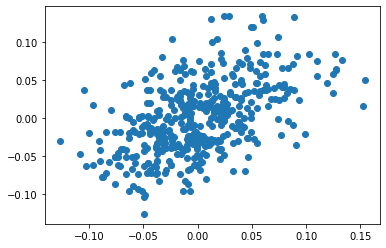

In [14]:
plt.scatter(diabetes_df['s1'],diabetes_df['s5'])

&#9989; **<font color=red>Q:</font>** What are the confidence intervals for  $\hat \beta_1$ in the two cases (the prediction using `s1` and the prediction using `s5`)? Which is wider and why?  

the confidence intervals for s1 are 95% and 5%. the confidence intervals for s5 are the same. 

&#9989; **<font color=red>Q:</font>** What is the conclusion of the hypothesis test 
$$H_0: \text{ There is no relationship between $X$ and $Y$}$$
$$H_a: \text{ There is some relationship between $X$ and $Y$}$$
at a confidence level of $\alpha = 0.05$?

Your answer here

In [15]:
916.13 + 1.96 * 63

1039.61

Oh hey look, there's another table with information stored by the statsmodel class. 

In [19]:
est1.summary().tables[0]

Dep. Variable:,target,R-squared:,0.045
Model:,OLS,Adj. R-squared:,0.043
Method:,Least Squares,F-statistic:,20.71
Date:,"Thu, 09 Feb 2023",Prob (F-statistic):,6.92e-06
Time:,10:34:54,Log-Likelihood:,-2537.0
No. Observations:,442,AIC:,5078.
Df Residuals:,440,BIC:,5086.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [20]:
est5.summary().tables[0]

Dep. Variable:,target,R-squared:,0.320
Model:,OLS,Adj. R-squared:,0.319
Method:,Least Squares,F-statistic:,207.3
Date:,"Thu, 09 Feb 2023",Prob (F-statistic):,8.82e-39
Time:,10:34:56,Log-Likelihood:,-2461.9
No. Observations:,442,AIC:,4928.
Df Residuals:,440,BIC:,4936.
Df Model:,1,,
Covariance Type:,nonrobust,,


&#9989; **<font color=red>Q:</font>** What is $R^2$ for the two models?

0.045 for s1, 0.320 for s5. 

![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 3.  Simulating data 
Ok, let's run an example like was shown in class where we see the distribution of possible values. 

In [21]:
# Here's code that decides on my function 
def myFunc(x, b0 = 2, b1 = 5): 
    return b0 + b1 * x


# Here's a command that generates 100 random data points from f(x) + epsilon
def makeData(n = 100):
    X = np.random.uniform(-2,2,n)
    y = myFunc(X) + np.random.normal(size = n)
    return X,y

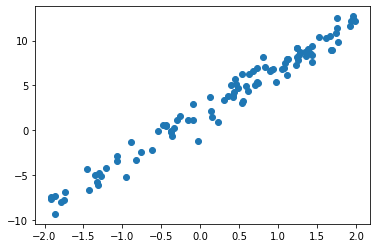

In [22]:
# Everytime you run this cell, you get slightly different data

X,y = makeData()

plt.scatter(X,y)

In [23]:
# Which means that every time you run this cell, you get a slightly different choice of coefficients
# for the model learned

X,y = makeData()
X = X.reshape([len(X),1])
y = y.reshape([len(y),1])
reg = LinearRegression()
reg.fit(X,y)
print( 'y=' + str(round(reg.coef_[0,0],4)) +  "x_1 + " +  str(round(reg.intercept_[0],4)) )


y=5.0467x_1 + 2.0731


# 4. Multiple linear regression 
Next we get some code up and running that can do linear regression with multiple input variables, that is when the model is of the form
$$
Y =  \beta_0 +  \beta_1 X_1 +  \beta_2 X_2 + \cdots +  \beta_pX_p + \varepsilon
$$

We first model `target = beta_0 + beta_1 *s1 + beta_2 * s5` using `scikitlearn`.

In [32]:
X = diabetes_df[['s1','s5']].values
y = diabetes_df['target'].values

multireg = LinearRegression() #<----- notice I'm using exactly the same command as above
multireg.fit(X,y)

print(multireg.coef_)
print(multireg.intercept_)

[-175.70879486 1006.71674044]
152.1334841628963


&#9989; **<font color=red>Q:</font>** What are the values for $\beta_0$, $\beta_1$, and $\beta_2$? Write an interpretation for the $\beta_2$ value in this data set. 

b0 = -175.70879486 
b1 = 1006.71674044
b2 = 152.1334841628963

In [33]:
diabetes_df.var()

age          0.002268
sex          0.002268
bmi          0.002268
bp           0.002268
s1           0.002268
s2           0.002268
s3           0.002268
s4           0.002268
s5           0.002268
s6           0.002268
target    5943.331348
dtype: float64

We next model `target = beta_0 + beta_1 *s1 + beta_2 * s5` using `statsmodels`. Do you get the same model?

In [35]:
# multiple least squares with statsmodel
multiple_est = smf.ols('target ~ s1 + s5', diabetes_df).fit()
multiple_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           9.63e-39
Time:                        10:45:05   Log-Likelihood:                -2459.0
No. Observations:                 442   AIC:                             4924.
Df Residuals:                     439   BIC:                             4936.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.011     50.528      0.000     146.216     158.051
s1          -175.7088     73.872     -2.379      0.018    -320.895     -30.522
s5          1006.7167     73.872     13.628      0.000     861.530    1151.903
==============================================================================
Omnibus:                       10.294   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.496
Skew:                           0.356   Prob(JB):                      0.00526
Kurtosis:                       2.748   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **<font color=red>Q:</font>** What is the predicted model? How much trust can we place in the estimates?

we can place a good amount of trust in the estimates due to the process we went about getting them. 

&#9989; **<font color=red>Q:</font>** Run the linear regression to predict `target` using all the other variables. What do you notice about the different terms? Are some more related than others? 

In [38]:
multiple_est = smf.ols('target ~ s1 + s2 + s3 + s4 + s5', diabetes_df).fit()
multiple_est.summary() #higher r squared, more related terms for the last one 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     49.27
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.12e-40
Time:                        10:47:20   Log-Likelihood:                -2448.2
No. Observations:                 442   AIC:                             4908.
Df Residuals:                     436   BIC:                             4933.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.948     51.606      0.000     146.339     157.928
s1          -937.0863    475.082     -1.972      0.049   -1870.821      -3.352
s2           746.4373    385.349      1.937      0.053     -10.934    1503.809
s3            32.4857    242.477      0.134      0.893    -444.083     509.055
s4            17.4166    183.090      0.095      0.924    -342.432     377.265
s5          1163.7637    190.979      6.094      0.000     788.409    1539.119
==============================================================================
Omnibus:                        9.870   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.701
Skew:                           0.278   Prob(JB):                       0.0129
Kurtosis:                       2.595   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **<font color=red>Q:</font>** Earlier you determined the p-value for the `s1` variable when we only used `s1` to predict `target`. What changed about the p-value for `s1` now where it is part of a regression using all the variables. Why?

0.049 is teh new s1 p value.  it used to be 0.018 so it got larger. still not statistically significant. so null hyp rejected but just barely now. 



-----
### Congratulations, we're done!

Written by Dr. Liz Munch, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [10, 11]])
A1 = np.concatenate([A,B],axis = 1)

#Same number of rows w/ result [[1, 2, 3, 7, 8],[4, 5, 6, 10, 11]]
print('shape of A is ', np.shape(A), '; shape of B is ', np.shape(B))

In [ ]:
C = np.array([[1, 2, 3],[4, 5, 6]])
D = np.array([3, 3, 3])
#np.concatenate([C,D], axis = 0) 
print('shape of C is ', np.shape(C), '; shape of D is ', np.shape(D))

In [ ]:
C = np.array([[1, 2, 3],[4, 5, 6]])
D = np.array([[3, 3, 3]])

print('shape of C is ', np.shape(C), '; shape of D is ', np.shape(D))
np.concatenate([C,D], axis = 0) 

In [ ]:
A[0]